# Xtern Work Sample Assessment - Data Science

This is the Data Science work sample assessment for the Summer 2025 Xtern program

In [140]:
#import statements!
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

#importing Dataset
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')


In [141]:
#cleaning data

#renaming some columns
df = df.rename(columns = {"User ID":"User_ID",
                          "Fan Challenges Completed":"Fan_Challenges_Completed",
                          "Predictive Accuracy (%)":"Predictive_Accuracy_Percentage",
                          "Virtual Merchandise Purchases":"Online_Purchases", 
                          "Sponsorship Interactions (Ad Clicks)" : "Ad_Clicks",
                          "Time on Live 360 (mins)":"Minutes_on_Live360",
                          "Real-Time Chat Activity (Messages Sent)":"Chat_Messages_Sent"})

#removing the U in front of every user ID
df['User_ID'] = df['User_ID'].str.split(pat = 'U').str[1]

#changing the 'User ID' column data type to an integer
df['User_ID'] = df['User_ID'].astype('int')

C:\Users\tdwil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tdwil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tdwil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tdwil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

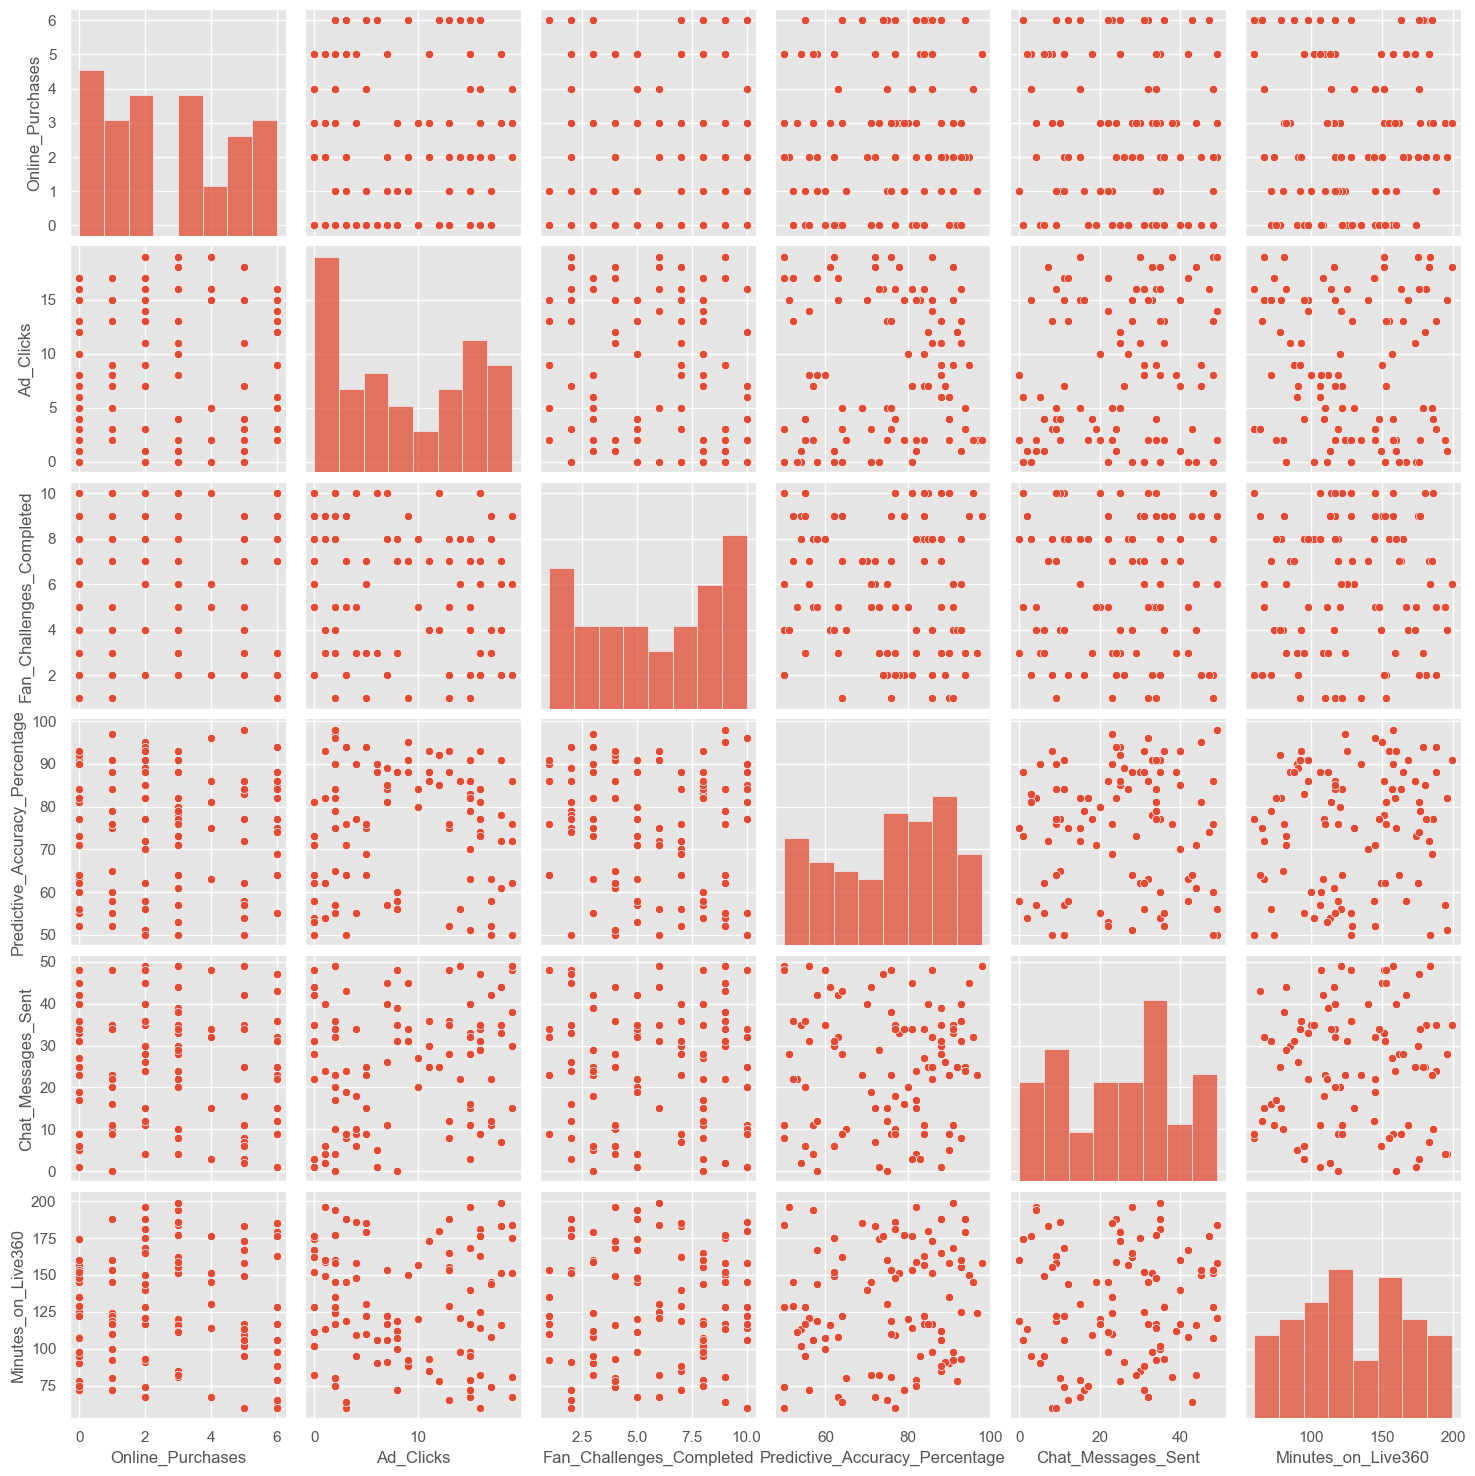

In [142]:
#exploratory analysis - plotting to try and discover any obvious correlations
g=sns.pairplot(df, vars=['Online_Purchases',
                       'Ad_Clicks',
                       'Fan_Challenges_Completed',
                       'Predictive_Accuracy_Percentage',
                       'Chat_Messages_Sent',
                       'Minutes_on_Live360'])
plt.show()
file_name = ('Data-Visualization-Plots/Exploratory-Plots/pairplots.pdf')
g.savefig(file_name)

In [143]:
#importing for KMeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Ad_Clicks','Chat_Messages_Sent']]
wcss = []

#Unused Columns: 'Fan_Challenges_Completed','Minutes_on_Live360','Online_Purchases','Predictive_Accuracy_Percentage'


In [144]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wcss.append(kmeans.intertia_)

C:\Users\tdwil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AttributeError: 'KMeans' object has no attribute 'intertia_'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

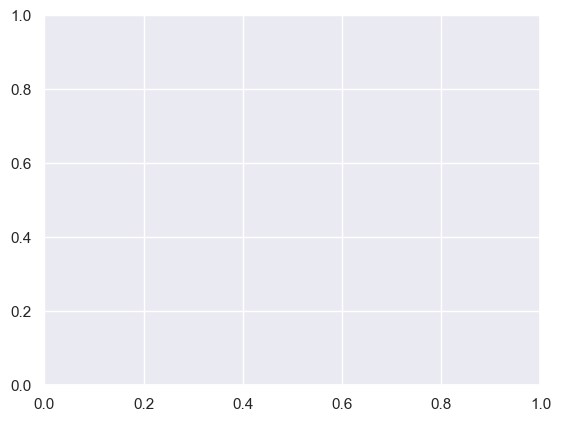

In [145]:
sns.set()

plt.plot(range(1,11),wcss)
plt.title('Getting the Number of Clusters Using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

C:\Users\tdwil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


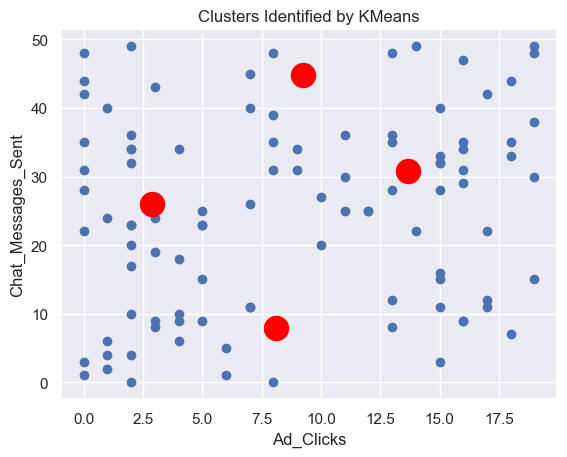

In [160]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=20, random_state=0)
y_pred = kmeans.fit_predict(X)
plt.scatter(X['Ad_Clicks'], X['Chat_Messages_Sent'])
plt.ylabel("Chat_Messages_Sent")
plt.xlabel("Ad_Clicks")
plt.title("Clusters Identified by KMeans")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

file_path = ('Data-Visualization-Plots/KMeans-Model/Ad_Clicks_vs_Chat_Messages_Sent.pdf')
plt.savefig(file_path)

In [154]:
#importing for Gaussian Clusters
from sklearn.mixture import GaussianMixture

In [155]:
n_clusters = 6
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

C:\Users\tdwil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=6)

In [156]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

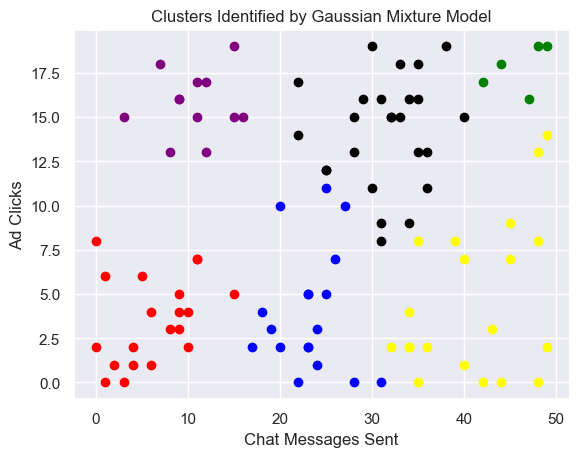

In [159]:
color=['blue','green','red','black','yellow','purple']

for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data['Chat_Messages_Sent'],data['Ad_Clicks'],c= color[k])

plt.title("Clusters Identified by Gaussian Mixture Model")
plt.xlabel("Chat Messages Sent")
plt.ylabel("Ad Clicks")

file_path2 = ('Data-Visualization-Plots/Gaussian-Mixture-Model/Ad_Clicks_vs_Chat_Messages_Sent.pdf')
plt.savefig(file_path2)

In [151]:
from sklearn.cluster import SpectralClustering

In [152]:
spectral_cluster_model= SpectralClustering(
    n_clusters=5, 
    random_state=64, 
    n_neighbors=20, 
    affinity='nearest_neighbors'
)

C:\Users\tdwil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


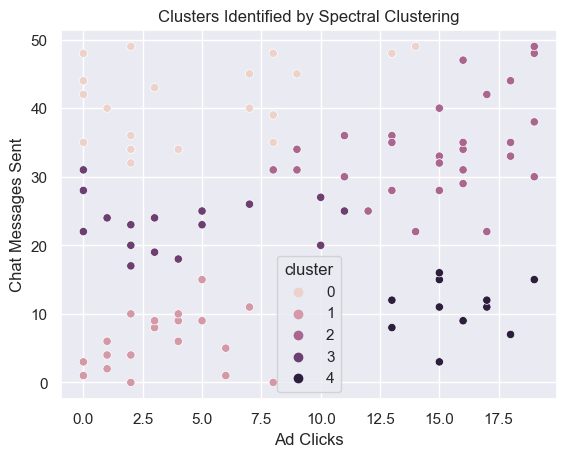

In [153]:
X['cluster'] = spectral_cluster_model.fit_predict(X)


fig, ax = plt.subplots()
sns.scatterplot(x='Ad_Clicks', y='Chat_Messages_Sent', data=X, hue='cluster', ax=ax)
ax.set(title='Clusters Identified by Spectral Clustering',xlabel = 'Ad Clicks', ylabel='Chat Messages Sent')

file_path = ('Data-Visualization-Plots/Spectral-Cluster-Model/Ad_Clicks_vs_Chat_Messages_Sent.pdf')
plt.savefig(file_path)